In [3]:
import pandas as pd
import matplotlib.pyplot as plt
# Opcional: estilos bonitos
import seaborn as sns
sns.set_theme(style="whitegrid")

df = pd.read_csv("ventas_portafolio.csv", parse_dates=["Fecha"])
df.head()


,Fecha,Producto,Categoría,Región,Canal,Cantidad,PrecioUnitario,CostoUnitario,Ventas,Costo,Margen,MargenPct
0,2024-04-12,Smartphone X,Electrónica,Este,Online,1,1235.51,700.28,1235.51,700.28,535.23,0.4332
1,2024-05-10,Purificador A2,Hogar,Norte,Distribuidor,1,583.75,369.90,583.75,369.90,213.85,0.3663
2,2025-04-19,Pack Proteico,Alimentos,Centro,Retail,2,43.77,28.77,87.54,57.54,30.00,0.3427
3,2024-05-10,Smartphone X,Electrónica,Norte,Online,2,1317.92,704.24,2635.84,1408.48,1227.36,0.4656
4,2025-03-30,Horno Smart,Hogar,Centro,Online,2,484.43,223.30,968.86,446.60,522.26,0.5390


In [7]:
df["AñoMes"] = df["Fecha"].dt.to_period("M").astype(str)
df["TicketPromedio"] = (df["Ventas"]/df["Cantidad"]).round(2)

kpis = {
    "ventas_totales": float(df["Ventas"].sum()),
    "margen_total": float(df["Margen"].sum()),
    "margen_pct_total": float(df["Margen"].sum()/df["Ventas"].sum()),
    "items_vendidos": int(df["Cantidad"].sum()),
    "ticket_promedio_global": float(df["Ventas"].sum()/df["Cantidad"].sum())
}
kpis


{'ventas_totales': 10452120.83,
 'margen_total': 3926373.85,
 'margen_pct_total': 0.37565331609355307,
 'items_vendidos': 26213,
 'ticket_promedio_global': 398.7380624117804}

In [6]:
df["AñoMes"] = df["Fecha"].dt.to_period("M").astype(str)

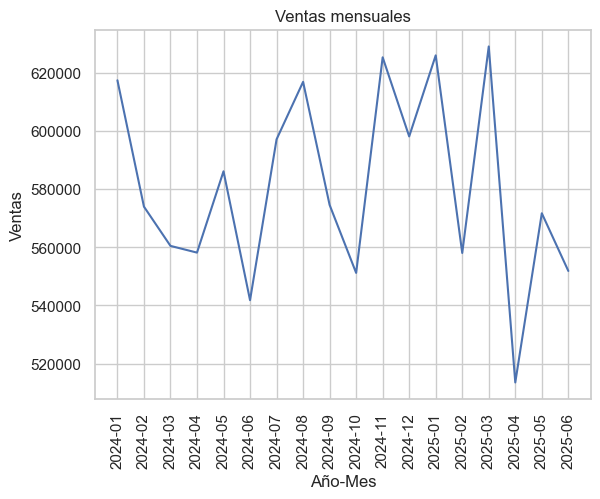

In [15]:
ventas_mensuales = df.groupby("AñoMes")["Ventas"].sum().reset_index()

plt.figure()
plt.plot(ventas_mensuales["AñoMes"], ventas_mensuales["Ventas"])
plt.xticks(rotation=90)
plt.title("Ventas mensuales"); plt.xlabel("Año-Mes"); plt.ylabel("Ventas (Q)")
plt.show()


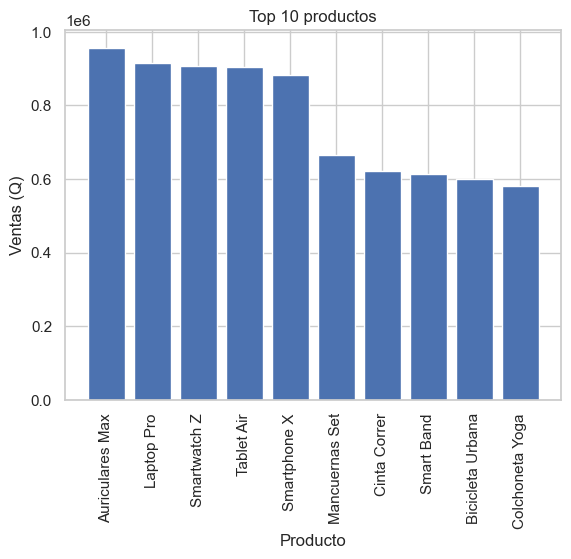

In [16]:
top_prod = df.groupby("Producto")["Ventas"].sum().nlargest(10).reset_index()

plt.figure()
plt.bar(top_prod["Producto"], top_prod["Ventas"])
plt.xticks(rotation=90)
plt.title("Top 10 productos"); plt.xlabel("Producto"); plt.ylabel("Ventas (Q)")
plt.show()

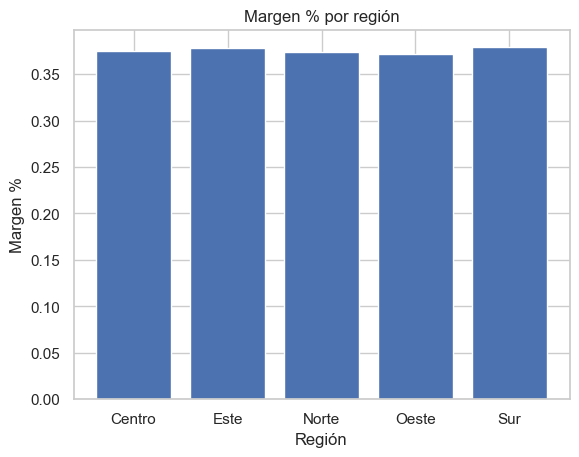

In [12]:
reg = df.groupby("Región")[["Ventas","Margen"]].sum().reset_index()
reg["MargenPct"] = (reg["Margen"]/reg["Ventas"]).round(3)

plt.figure()
plt.bar(reg["Región"], reg["MargenPct"])
plt.title("Margen % por región"); plt.xlabel("Región"); plt.ylabel("Margen %")
plt.show()


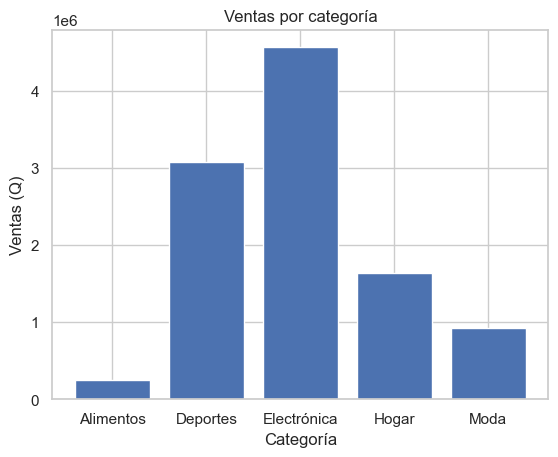

In [17]:
ventas_cat = df.groupby("Categoría")["Ventas"].sum().reset_index()

plt.figure()
plt.bar(ventas_cat["Categoría"], ventas_cat["Ventas"])
plt.title("Ventas por categoría"); plt.xlabel("Categoría"); plt.ylabel("Ventas (Q)")
plt.show()


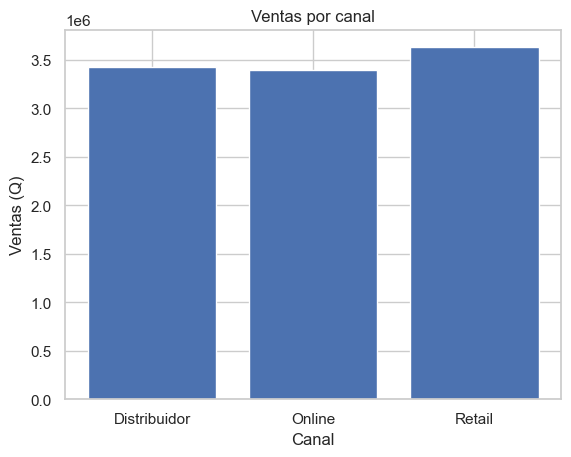

In [24]:
ventas_canal = df.groupby("Canal")["Ventas"].sum().reset_index()

plt.figure()
plt.bar(ventas_canal["Canal"], ventas_canal["Ventas"])
plt.title("Ventas por canal"); plt.xlabel("Canal"); plt.ylabel("Ventas (Q)")
plt.show()


In [25]:
df.to_csv("ventas_limpias.csv", index=False)
ventas_mensuales.to_csv("ventas_mensuales.csv", index=False)
top_prod.to_csv("top_productos.csv", index=False)
ventas_cat.to_csv("ventas_por_categoria.csv", index=False)
reg.to_csv("margen_por_region.csv", index=False)
